In [1]:
# first neural network for 1 NEURON WITH 3 INPUTS
inputs = [1,2,3]
weights = [0.2, 0.8, -0.5]
bias = 2
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
output

2.3

In [2]:
# FOR 3 NEURONS and 4 INPUTS
inputs = [1,2,3, 2.5]
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]
bias1 = 2
bias2 = 3
bias3 = 0.5
output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
         inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
         inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3,]
output

[4.8, 1.21, 2.385]

In [3]:
# A BIT SIMPLIFIED BY USE OF LOOps

inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
biases = [2,3,0.5]
layer_output = [] # output of current layer
for neuron_weights, neuron_bias in zip(weights,biases):
    neuron_output = 0 # output of given neuron
    for n_inputs, weight in zip(inputs,neuron_weights):
        neuron_output += n_inputs*weight # basically the (inputs*weights) part of original code
    neuron_output += neuron_bias # the (+ bias) part
    layer_output.append(neuron_output)
layer_output

[4.8, 1.21, 2.385]

In [4]:
# further simplification via numpy 
import numpy as np
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
biases = [2,3,0.5]
output = np.dot(weights,inputs) + biases # we just did that loop thing in one fukcing line 
output

array([4.8  , 1.21 , 2.385])

In [5]:
# USING BATCHES OF INPUTS
inputs = [[1, 2, 3, 2.5], [2.0, 5.0, -1.0, 2.0], [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
biases = [2,3,0.5]
output = np.dot(inputs, np.array(weights).T) + biases # we did the transpose to keep the shapes intact
output

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

In [6]:
# adding another layer 
inputs = [[1, 2, 3, 2.5], 
          [2.0, 5.0, -1.0, 2.0], 
          [-1.5, 2.7, 3.3, -0.8]]

weights1 = [[0.2, 0.8, -0.5, 1.0], 
            [0.5, -0.91, 0.26, -0.5], 
            [-0.26, -0.27, 0.17, 0.87]]

biases1 = [2,3,0.5]

weights2 = [[0.1, -0.14, 0.5], 
            [0.5, 0.12, -0.33], 
            [-0.44, 0.73, -0.13]]

biases2 = [-1,2,-0.5]

layer1_outputs = np.dot(inputs, np.array(weights1).T) + biases1 

layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
layer2_outputs

array([[ 0.5031 ,  3.75815, -2.03875],
       [ 0.2434 ,  6.1668 , -5.7633 ],
       [-0.99314,  2.82254, -0.35655]])

In [7]:
# MAKING THINGS AS AN OBJECT 
import numpy as np
np.random.seed(0)   # for the same output each run 
X = [[1, 2, 3, 2.5], 
      [2.0, 5.0, -1.0, 2.0], 
      [-1.5, 2.7, 3.3, -0.8]]
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
layer2.forward(layer1.output)
layer2.output

array([[ 0.148296  , -0.08397602],
       [ 0.14100315, -0.01340469],
       [ 0.20124979, -0.07290616]])

In [8]:
# CODE FOR RELU FxN
import numpy as np
np.random.seed(0)   # for the same output each run 
X = [[1, 2, 3, 2.5], 
      [2.0, 5.0, -1.0, 2.0], 
      [-1.5, 2.7, 3.3, -0.8]]
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = []
for i in inputs:
    if i>0:
        output.append(i)
    elif i<=0:
        output.append(0)
output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [9]:
# that whole loop can be dicthed and ran as 
import numpy as np
np.random.seed(0)   # for the same output each run 
X = [[1, 2, 3, 2.5], 
      [2.0, 5.0, -1.0, 2.0], 
      [-1.5, 2.7, 3.3, -0.8]]
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = [i if i > 0 else 0 for i in inputs]
output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [10]:
# writting ReLU as an object too 
import numpy as np
np.random.seed(0)   # for the same output each run 
X = [[1, 2, 3, 2.5], 
      [2.0, 5.0, -1.0, 2.0], 
      [-1.5, 2.7, 3.3, -0.8]]
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
    def __call__(self,inputs):  # to make it cleaner and remove the need of writing .forward everytime
        return self.forward(inputs)

class activation_ReLU:
    def forward(self, inputs):
        output = np.maximum(0,inputs)
    def __call__(self, inputs):
        return self.forward(inputs)

layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1(X)
layer2(layer1.output)
layer2.output

array([[ 0.148296  , -0.08397602],
       [ 0.14100315, -0.01340469],
       [ 0.20124979, -0.07290616]])

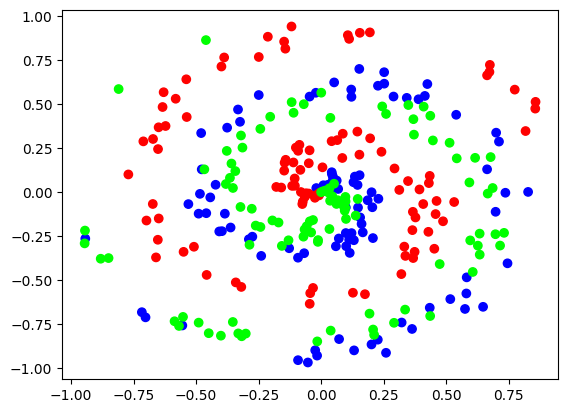

In [11]:
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y


import matplotlib.pyplot as plt
X, y = spiral_data(100, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

In [12]:
# using activation in the spiral_data dataset 
import numpy as np
np.random.seed(0)
X, y = spiral_data(100, 3)
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
    def __call__(self,inputs):  # to make it cleaner and remove the need of writing .forward everytime
        return self.forward(inputs)

class activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)
    def __call__(self, inputs):
        return self.forward(inputs)

layer1 = Layer_Dense(2,5)
activation1 = activation_ReLU()
layer1(X)
activation1(layer1.output)


In [13]:
# exponenting in raw python
import math 
layer_output = [4.8,1.21,2.385]
E = math.e
exp_values = []
for outputs in layer_output:
    exp_values.append(E**outputs)

print('exp values:',exp_values)

# normalizing the exponentiated values

norm_base = sum(exp_values)
norm_values = []
for values in exp_values:
    norm_values.append(values/norm_base)

print('norm values:',norm_values)


exp values: [121.51041751873483, 3.353484652549023, 10.859062664920513]
norm values: [0.8952826639572619, 0.024708306782099374, 0.0800090292606387]


In [14]:
# doing it via numpy
# exponenting in raw python
import numpy as np

layer_output = [[4.8, 1.21, 2.385],
                [8.9, -1.81, 0.2],
                [1.41, 1.051, 0.026]]


exp_values = np.exp(layer_output - np.max(layer_output, axis=1, keepdims=True))
probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

print(probabilities)

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


In [15]:
# also adding the softmax activation as an object 

import numpy as np
np.random.seed(0)
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
    def __call__(self,inputs):  # to make it cleaner and remove the need of writing .forward everytime
        return self.forward(inputs)

class activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)
    def __call__(self, inputs):
        return self.forward(inputs)

class activation_softmax:
    def forward(self,inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        self.output = exp_values / np.sum(exp_values, axis = 1, keepdims = True) 
    def __call__ (self, inputs):
        return self.forward(inputs)

X,y = spiral_data(100, 3)
layer1 = Layer_Dense(2,3)
activation1 = activation_ReLU()
layer2 = Layer_Dense(3,3)
activation2 = activation_softmax()

layer1(X)
activation1(layer1.output)
layer2(activation1.output)
activation2(layer2.output)